# Линейная регрессия на данных роста и веса 25 тысяч подростков

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('weights_heights.csv', index_col='Index')
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


Гистрограммы распредления признаков:

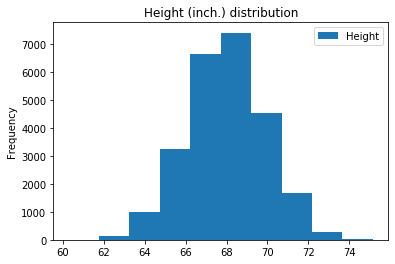

In [4]:
data.plot(y='Height', kind='hist', title='Height (inch.) distribution')

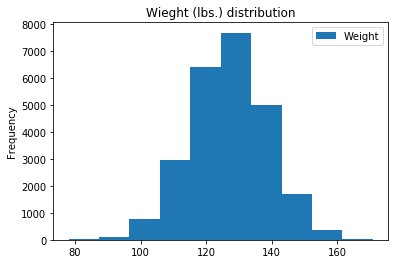

In [6]:
data.plot(y='Weight', kind='hist', title='Wieght (lbs.) distribution')

Интереснее будет добавить третий признак: индекс массы тела [BMI](https://en.wikipedia.org/wiki/Body_mass_index).

In [15]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

In [17]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)

Попарные зависимости признаков:

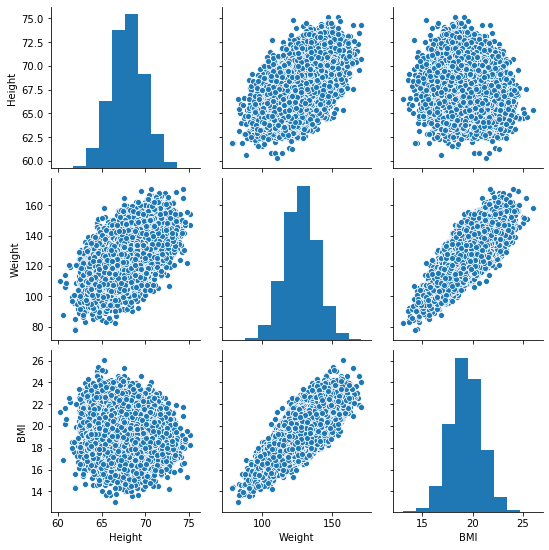

In [18]:
sns.pairplot(data)

Разобьём вес на 3 категории: 1 - если вес меньше 120 фунтов, 3 - если вес больше 150 фунтов, 2 - в остальных случаях. Построим ящик с усами для зависимости роста от весовой категории:

In [1]:
def get_category(weight):
    if weight < 120:
        return 1
    elif weight <= 150:
        return 2
    return 3